In [ ]:
### Gold Price Prediction using ML

In [ ]:
### Import Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
### Load Data

In [39]:
df = pd.read_csv('gold_price_data.csv')

df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
### Perform EDA

In [4]:
df.shape

(2290, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 98.5+ KB


In [6]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
## Check for Misising and Null Values

df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
### Check Correlation

corr = df.corr()

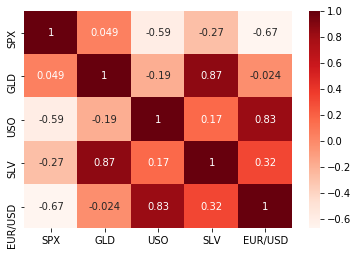

In [15]:
sns.heatmap(corr, annot = True, cmap = 'Reds')

plt.show()

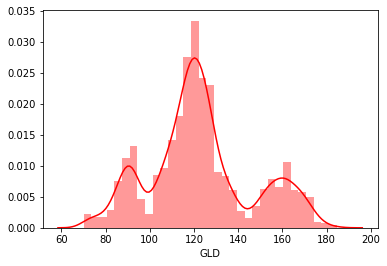

In [23]:
## Check the distribution of the GLD Price


sns.distplot(df['GLD'], color = 'red')

plt.show()

In [ ]:
## Split the Data into Dependent & Independent

In [24]:
X = df.drop(['Date','GLD'], axis=1)

Y = df['GLD']

In [25]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [26]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
### Split Data into Training and Test Data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
### Model Training: Random Forest Regressor

In [30]:
regressor = RandomForestRegressor(n_estimators = 100)

regressor.fit (X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
### Prediction on Test Data

In [40]:
pred = regressor.predict(X_test)

print(pred)

[168.22899894  82.22699985 115.94929986 127.66590078 120.78930125
 154.60399719 149.90229826 126.06820046 117.50719848 125.93500085
 116.56040144 171.98410093 141.4268987  167.98739941 115.13440041
 117.51330042 138.6491034  170.13770088 160.04950297 160.23759924
 155.23400048 125.39130057 176.46469996 156.92930346 125.12730052
  93.78789954  77.51160015 120.68960016 119.05909904 167.44849988
  88.13290033 125.35140025  90.91770031 117.78890023 121.07719931
 136.16820122 115.25760135 114.74770091 148.35439969 107.06750085
 104.71280248  87.31899808 126.52520055 117.99960006 152.92989886
 119.54430034 108.42849962 108.09849804  93.15530057 127.06489801
  74.64040048 113.59079902 121.40080022 111.38169908 118.86429868
 120.77689928 159.13189981 166.85410157 146.88189647  85.74199886
  94.33590004  86.86229884  90.30740005 118.95280086 126.36610048
 127.53780003 169.78550024 122.23189945 117.38669872  98.5074001
 168.73300158 143.29269886 132.1817026  121.23290215 120.38419908
 119.604900

In [43]:
# R Squared Error


error = metrics.r2_score(Y_test, pred)

print("R squared error : ", error)

R squared error :  0.989831856117321


In [ ]:
### Display the actual and predicted data

In [44]:
pd.DataFrame(np.c_[Y_test , pred] , columns =['Actual' , 'Predicted'])

,Actual,Predicted
0,168.020004,168.228999
1,81.230003,82.227000
2,112.320000,115.949300
3,127.589996,127.665901
4,119.620003,120.789301
...,...,...
453,166.380005,167.639899
454,106.379997,108.238799
455,122.239998,121.834598
456,133.830002,138.435601


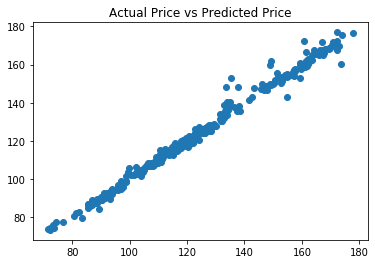

In [51]:
plt.scatter(Y_test, pred)
plt.title('Actual Price vs Predicted Price')

plt.show()

In [47]:
Y_test = list (Y_test)

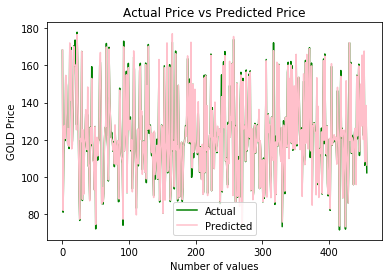

In [50]:
plt.plot(Y_test, color='green', label = 'Actual')
plt.plot(pred, color='pink', label='Predicted')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()